In [225]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [226]:
sns.set_style("whitegrid")

In [227]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL (4).csv


In [228]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [229]:
print("Phase 1: Data Exploration and Preprocessing")


Phase 1: Data Exploration and Preprocessing


In [230]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int6

In [231]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

In [232]:
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [233]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)


<ipython-input-233-492799e8c576>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-233-492799e8c576>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [234]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [235]:
#not needed for clustering
df.drop('CUST_ID', axis=1, inplace=True)
print("\n'CUST_ID' column dropped.")


'CUST_ID' column dropped.


In [236]:
# Handle Duplicates
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
if df.shape[0] < initial_rows:
    print(f"\nRemoved {initial_rows - df.shape[0]} duplicate rows.")


In [237]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"Number of outliers in '{column}': {len(outliers)}")
    return outliers

outliers_balance = detect_outliers_iqr(df, 'BALANCE')
outliers_purchases = detect_outliers_iqr(df, 'PURCHASES')
outliers_cash_advance = detect_outliers_iqr(df, 'CASH_ADVANCE')
outliers_credit_limit = detect_outliers_iqr(df, 'CREDIT_LIMIT')
outliers_payments = detect_outliers_iqr(df, 'PAYMENTS')
outliers_minimum_payments = detect_outliers_iqr(df, 'MINIMUM_PAYMENTS')


Number of outliers in 'BALANCE': 695
Number of outliers in 'PURCHASES': 808
Number of outliers in 'CASH_ADVANCE': 1030
Number of outliers in 'CREDIT_LIMIT': 248
Number of outliers in 'PAYMENTS': 808
Number of outliers in 'MINIMUM_PAYMENTS': 909


In [238]:
#Outlier Handling using Winsorizing
def winsorize_series(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

features_to_winsorize = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                         'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for feature in features_to_winsorize:
    df[feature] = winsorize_series(df[feature])
    print(f"Feature '{feature}' winsorized.")

print("\nOutliers handled using winsorizing.")



Feature 'BALANCE' winsorized.
Feature 'PURCHASES' winsorized.
Feature 'ONEOFF_PURCHASES' winsorized.
Feature 'INSTALLMENTS_PURCHASES' winsorized.
Feature 'CASH_ADVANCE' winsorized.
Feature 'CREDIT_LIMIT' winsorized.
Feature 'PAYMENTS' winsorized.
Feature 'MINIMUM_PAYMENTS' winsorized.

Outliers handled using winsorizing.


In [239]:
# Feature Scaling
scaler = StandardScaler()


In [240]:
# Fit and transform the data
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) # Convert back to DataFrame


In [241]:
print("\nData after scaling:")
print(df_scaled.head())


Data after scaling:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.877821          -0.249434  -0.729687         -0.692383   
1  1.178546           0.134325  -0.838160         -0.692383   
2  0.718487           0.518084   0.040957          0.818320   
3  0.179623          -1.016953   0.866246          2.128108   
4 -0.372561           0.518084  -0.819967         -0.661121   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.505216     -0.673507            -0.806490   
1               -0.746029      2.115343            -1.221758   
2               -0.746029     -0.673507             1.269843   
3               -0.746029     -0.467401            -1.014125   
4               -0.746029     -0.673507            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2             

In [242]:
print("Phase 2: Determining Optimal Clusters ")

Phase 2: Determining Optimal Clusters 


In [243]:
# Using the Elbow Method to find optimal K
wcss = [] # Within-Cluster Sum of Squares
max_k = 10 # Consider up to 10 clusters
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


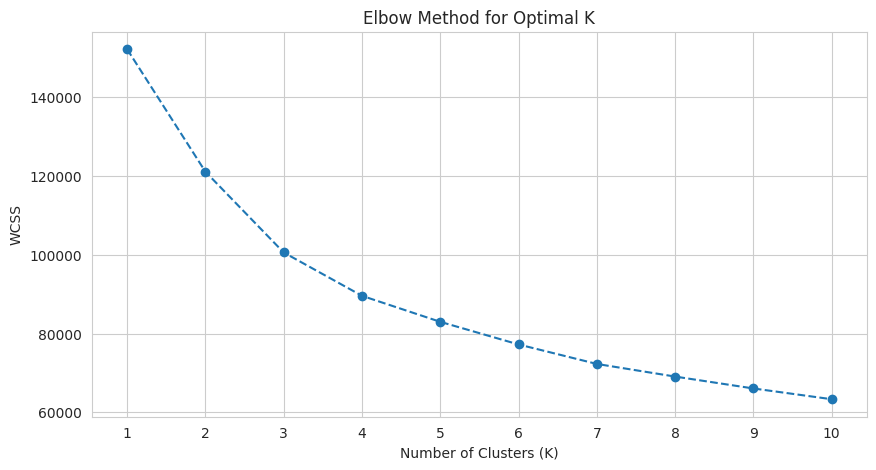

In [244]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [245]:
# Using the Silhouette Score to find optimal K
silhouette_scores = []

for i in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

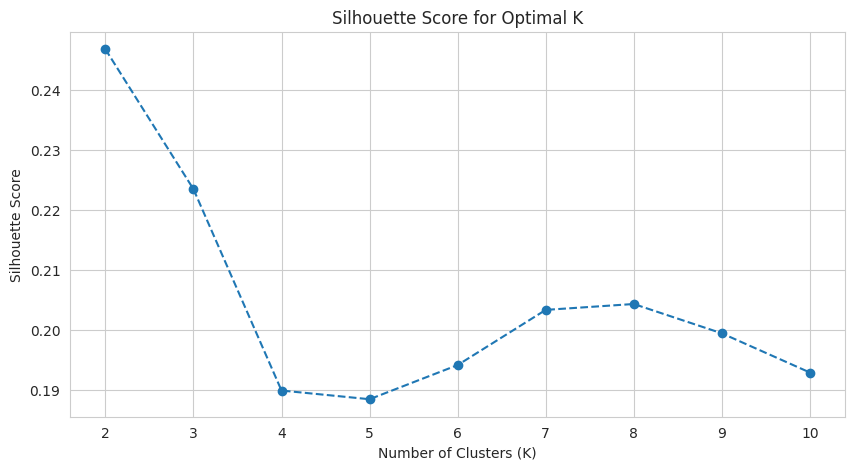

In [246]:
# Plot the Silhouette Score graph
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_k + 1))
plt.grid(True)
plt.show()


In [247]:
optimal_k = 3
print(f"\nAssuming Optimal number of clusters (K) is: {optimal_k} ")



Assuming Optimal number of clusters (K) is: 3 


In [248]:
#Phase 3: Customer Segmentation

In [249]:
print(f"\n Phase 3: Customer Segmentation (with K={optimal_k})")



 Phase 3: Customer Segmentation (with K=3)


In [250]:
# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

In [251]:
# Add cluster labels to the unscaled DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels


In [252]:
print("\nDataset with Cluster Labels:")
print(df_clustered.head())


Dataset with Cluster Labels:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.636364    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                         

In [253]:
# Analyze Cluster Char
cluster_profiles = df_clustered.groupby('Cluster').mean()
print("\nCluster Profiles (Mean of Features per Cluster):")
print(cluster_profiles)




Cluster Profiles (Mean of Features per Cluster):
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1658.208463           0.972756  2103.821608       1004.097524   
1        3066.945354           0.953281   271.600890        162.607115   
2         618.456619           0.808444   366.790416        166.577928   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    746.607723    362.467758             0.905263   
1                     91.914177   2099.081624             0.203925   
2                    193.090614    233.709219             0.435328   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.555721                          0.684656   
1        

In [254]:
print("\nPhase 4: Visualization and Analysis")



Phase 4: Visualization and Analysis


In [255]:
# Using PCA for dimensionality reduction to visualize clusters in 2D
pca = PCA(n_components=2)

In [256]:
# Fit PCA on the scaled data and transform
df_pca = pca.fit_transform(df_scaled)


In [257]:
# create df for results
df_pca = pd.DataFrame(data=df_pca, columns=['PCA 1', 'PCA 2'])


In [258]:
df_pca['Cluster'] = cluster_labels

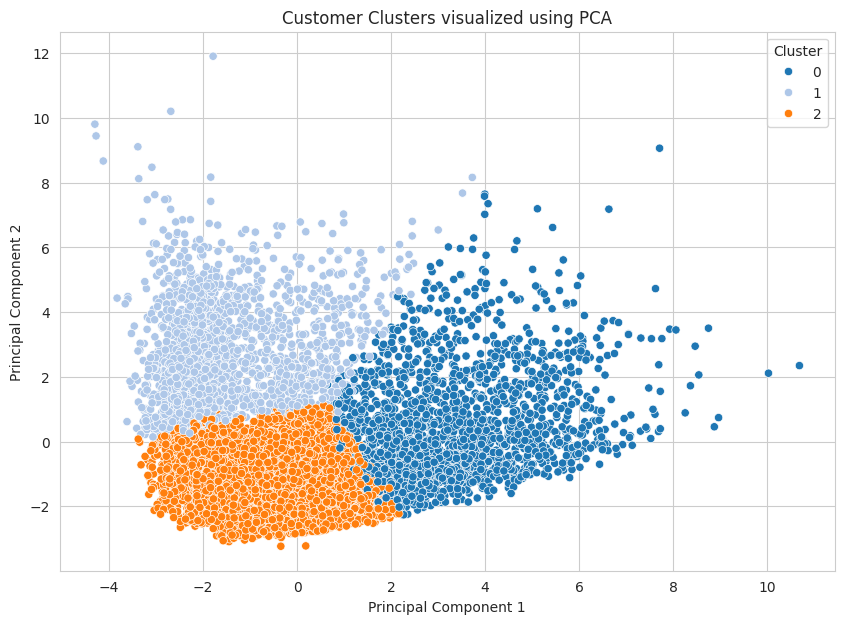

In [259]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', data=df_pca, palette='tab20', legend='full')
plt.title('Customer Clusters visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

<ipython-input-260-0ec25d46a4bb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-260-0ec25d46a4bb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




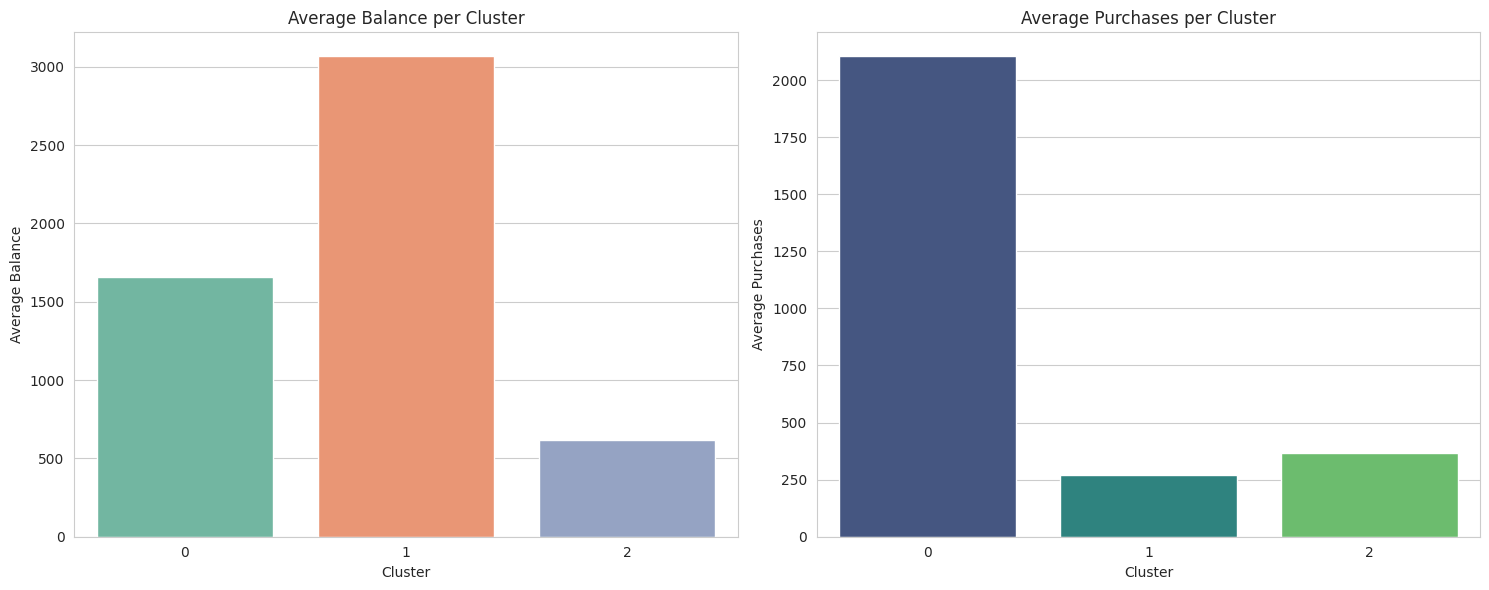

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=cluster_profiles.index, y='BALANCE', data=cluster_profiles, ax=axes[0], palette='Set2')
axes[0].set_title('Average Balance per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Balance')

sns.barplot(x=cluster_profiles.index, y='PURCHASES', data=cluster_profiles, ax=axes[1], palette='viridis')
axes[1].set_title('Average Purchases per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Purchases')

plt.tight_layout()
plt.show()

<ipython-input-261-1aa7d7e3a1cc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-261-1aa7d7e3a1cc>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




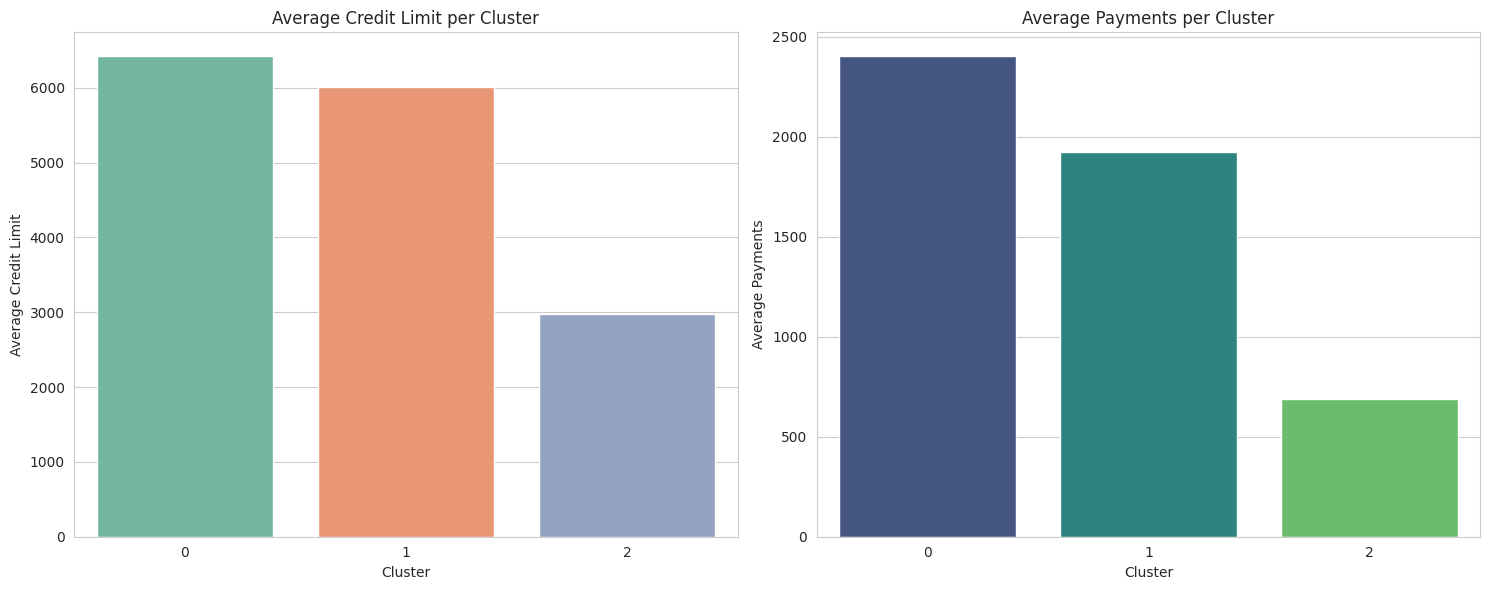

In [261]:
# Example: Average Credit Limit and Payments
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=cluster_profiles.index, y='CREDIT_LIMIT', data=cluster_profiles, ax=axes[0], palette='Set2')
axes[0].set_title('Average Credit Limit per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Credit Limit')

sns.barplot(x=cluster_profiles.index, y='PAYMENTS', data=cluster_profiles, ax=axes[1], palette='viridis')
axes[1].set_title('Average Payments per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Average Payments')

plt.tight_layout()
plt.show()

In [262]:
print("\nCreating Customer Personas")

personas = {}
best_k = optimal_k

for cluster in range(best_k):
    cluster_size = len(df_clustered[df_clustered['Cluster'] == cluster])
    percentage = cluster_size / len(df_clustered)

    # Define persona details based on the characteristics of each cluster
    if cluster == 0:
        personas[f"Cluster {cluster}"] = {
            "Name": "Rania (Engaged Transactor)",
            "Characteristics": "High overall purchases (one-off & installments), high purchase frequency & transactions, high credit limit, high payments, high percentage of full payments.",
            "Percentage": f"{percentage:.1%}",
            "Recommendations": "Offer premium rewards/benefits, enhance loyalty programs, explore cross-selling for premium products."
        }
    elif cluster == 1:
        personas[f"Cluster {cluster}"] = {
            "Name": "Mohamed (High Balance Revolver)",
            "Characteristics": "Highest balance, very high cash advance amount, frequency & transactions, low purchase activity, low percentage of full payments, high minimum payments.",
            "Percentage": f"{percentage:.1%}",
            "Recommendations": "Prioritize risk management, offer financial wellness support/alternatives to cash advance, avoid purchase promotions."
        }
    elif cluster == 2:
        personas[f"Cluster {cluster}"] = {
            "Name": "Sarah (Lower Engagement Purchaser)",
            "Characteristics": "Lowest balance & credit limit, moderate purchase activity (especially installments), very low cash advance usage, moderate percentage of full payments.",
            "Percentage": f"{percentage:.1%}",
            "Recommendations": "Focus on increasing purchase engagement, offer tailored purchase/installment promotions, educate on card benefits, gradual credit limit increases."
        }
    else:
        personas[f"Cluster {cluster}"] = {
            "Name": "Unknown",
            "Characteristics": "Unknown",
            "Percentage": f"{percentage:.1%}",
            "Recommendations": "Unknown"
        }

print("\nCustomer Personas:")
# Convert the personas dictionary to a DataFrame
personas_df = pd.DataFrame(personas)
print(personas_df)


Creating Customer Personas

Customer Personas:
                                                         Cluster 0  \
Name                                    Rania (Engaged Transactor)   
Characteristics  High overall purchases (one-off & installments...   
Percentage                                                   22.5%   
Recommendations  Offer premium rewards/benefits, enhance loyalt...   

                                                         Cluster 1  \
Name                               Mohamed (High Balance Revolver)   
Characteristics  Highest balance, very high cash advance amount...   
Percentage                                                   22.0%   
Recommendations  Prioritize risk management, offer financial we...   

                                                         Cluster 2  
Name                            Sarah (Lower Engagement Purchaser)  
Characteristics  Lowest balance & credit limit, moderate purcha...  
Percentage                                 

In [263]:
print("\nPhase 5: Business Insights and Recommendations ")


Phase 5: Business Insights and Recommendations 


In [264]:
cluster_descriptions = {
    0: "Cluster 0: Low Usage, Low Balance Customers",
    1: "Cluster 1: High Purchase Customers",
    2: "Cluster 2: High Balance, Cash Advance Users"
}

for cluster, description in cluster_descriptions.items():
    print(f"Cluster {cluster}: {description}")


Cluster 0: Cluster 0: Low Usage, Low Balance Customers
Cluster 1: Cluster 1: High Purchase Customers
Cluster 2: Cluster 2: High Balance, Cash Advance Users


In [265]:
recommendations = {
    0: "Target with introductory offers.",
    1: "Offer rewards programs.",
    2: "Offer financial wellness resources."
}
for cluster, recommendation in recommendations.items():
    print(f"For Cluster {cluster}: {recommendation}")


For Cluster 0: Target with introductory offers.
For Cluster 1: Offer rewards programs.
For Cluster 2: Offer financial wellness resources.


In [266]:
import plotly.express as px
import plotly.graph_objects as go
!pip install dash jupyter-dash
!pip install dash plotly

In [267]:
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px

In [268]:
print("\nPreparing Data for Dashboard (PCA)")

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

df_dashboard = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_dashboard['Cluster'] = cluster_labels.astype(str)
# Add original features for hover data
for col in df.columns:
     if col not in ['Cluster']:
         df_dashboard[col] = df[col].values


Preparing Data for Dashboard (PCA)


In [269]:
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Credit Card Customer Segmentation Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Cluster:"),
        dcc.Dropdown(
            id='cluster-dropdown',
            options=[{'label': f'Cluster {i}', 'value': i} for i in sorted(df_clustered['Cluster'].unique())],
            value=sorted(df_clustered['Cluster'].unique())[0],
            clearable=False,
            style={'width': '50%', 'margin': 'auto'}
        )
    ], style={'padding': 20, 'textAlign': 'center'}),

    html.Div([
        dcc.Graph(id='cluster-scatter', style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='feature-distribution', style={'display': 'inline-block', 'width': '49%'})
    ]),

    html.Div([
        html.H3("Selected Cluster Statistics", style={'textAlign': 'center'}),
        html.Div(id='cluster-stats-table', style={'margin': 'auto', 'width': '98%'}) # Container for the table
    ], style={'padding': 20})
])

# Define the callback to update the dashboard based on dropdown selection
@app.callback(
    [Output('cluster-scatter', 'figure'),
     Output('feature-distribution', 'figure'),
     Output('cluster-stats-table', 'children')],
    [Input('cluster-dropdown', 'value')]
)
def update_dashboard(selected_cluster):
    # Scatter plot (show all data, color by cluster)
    scatter_fig = px.scatter(
        df_dashboard, x='PCA1', y='PCA2', color='Cluster',
        hover_data=df_dashboard.columns, # Hover over all features
        title='Customer Segments (Colored by Cluster)',
        labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'}
    )
    scatter_fig.update_layout(hovermode='closest')

    # Filter data for the selected cluster
    df_selected_cluster = df_clustered[df_clustered['Cluster'] == selected_cluster]

    # Feature distribution
    features_for_histogram = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
    dist_fig = px.histogram(
        df_selected_cluster,
        x=features_for_histogram, # Plot histograms for multiple features
        barmode='overlay',
        title=f'Feature Distribution for Cluster {selected_cluster}',
        labels={'value': 'Amount (Winsorized)', 'variable': 'Feature'}
    )
    dist_fig.update_layout(hovermode='closest')


    cluster_stats_df = df_selected_cluster.describe().reset_index()
    cluster_stats_df.rename(columns={'index': 'Statistic'}, inplace=True) # Rename index column

    stats_table = dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in cluster_stats_df.columns],
        data=cluster_stats_df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left', 'padding': '10px'},
        style_header={'backgroundColor': 'rgb(230, 230, 230)', 'fontWeight': 'bold'},
        style_data_conditional=[
            {
                'if': {'row_index': 'odd'},
                'backgroundColor': 'rgb(248, 248, 248)'
            }
        ],
    )

    return scatter_fig, dist_fig, stats_table

if __name__ == '__main__':
  app.run(mode='inline')

/usr/local/lib/python3.11/dist-packages/dash/dash.py:587: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>